In [4]:
] activate rnc2_prototype/

ErrorException: syntax: unexpected "]"

In [2]:
using Graphs
using GraphPlot
using DataFrames, Random

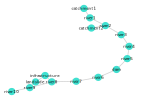

In [5]:
# Display graph
g = Graph(15) # graph with 3 vertices

# make a "river" with dam as center point
for i in 1:10
    add_edge!(g, i, i+1)
end

# add labels
nodelabel = ["river1", "river2", "river3", "river4", "river5", "dam", 
            "river6", "river7", "river8", "river9", "river10", "landslide", 
            "infrastructure", "catchment1", "catchment2"]

# add landslide node (12) that would impact river node (10)
add_edge!(g, 12, 10)
# connect landslide node (12) that could impact infrastructure node (13)
add_edge!(g, 12, 13)
# connect river node (9) that could flood infrastructure node (13)
add_edge!(g, 9, 13)
# add catchment node to river 1 and 2
add_edge!(g, 14, 1)
add_edge!(g, 15, 2)

gplot(g, nodelabel=nodelabel, nodesize=20, nodelabelsize=2)

In [6]:
nodelabel = ["river1", "river2", "river3", "river4", "river5",
            "dams", "river6", "river7", "river8", "river9", "river10",
            "landslide", "infrastructure"]

# edge_order would be DEM value
df = DataFrame(source = ["river1", "river2", "river3", "river4", "river5",
                        "dam", "river6", "river7", "river8", "river9",
                        "landslide", "landslide", "river8", "catchment1", "catchment2"], 
               target = ["river2", "river3", "river4", "river5",
               "dam", "river6", "river7", "river8", "river9", "river10",
               "river9", "infrastructure", "infrastructure", "river1", "river2"],
               type= ["river", "river", "river", "river", "river",
               "dam", "river", "river", "river", "river",
               "landslide", "landslide", "river", "catchment", "catchment"],
               source_ID = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 9, 13, 14],
               target_ID = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 10, 12, 12, 1, 2],
               edge_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 0, 0, 0, 0])

,source,target,type,source_ID,target_ID,edge_order
,String,String,String,Int64,Int64,Int64
1,river1,river2,river,1,2,1
2,river2,river3,river,2,3,2
3,river3,river4,river,3,4,3
4,river4,river5,river,4,5,4
5,river5,dam,river,5,6,5
6,dam,river6,dam,6,7,6
7,river6,river7,river,7,8,7
8,river7,river8,river,8,9,8
9,river8,river9,river,9,10,9


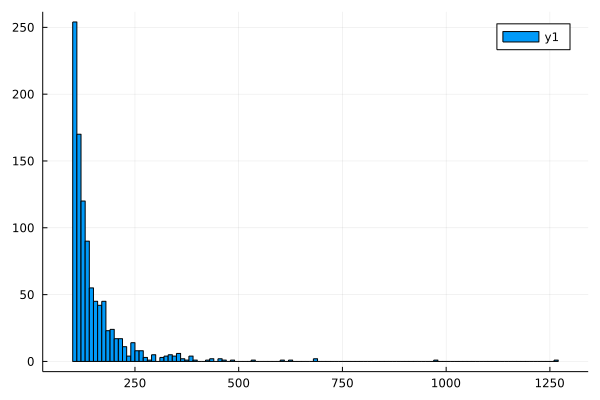

In [172]:
# representation of flow/runoff from randomised pareto distribution
using Distributions

α = 3
θ = 100

Pareto(α, θ)
sample = rand(Pareto(α, θ), 1000)

histogram(sample)

In [282]:
df_clock = []
river_base_flow = 1000.0

# Add the discharge
df.magnitude .= river_base_flow

# Parameters for pareto distributions
α = 3
θ = 100

# create delay attribute for each edges
df.delay .= 0
df.time .= 0

# state @ t0
push!(df_clock, df)


2

In [294]:
time_max = 2

for t in 1:time_max

    # start from the last state
    d = df_clock[end]

    # Create artificial landslide for each landslide source
    landslide(x) = (x=="landslide") ? rand(Pareto(α, θ), 1)[1] : 0
    d.event_magnitude = landslide.(df.type)

    # Create artificial runoff for each catchments (should come from weather pattern and volcanic activity)
    runoff(x) = (x=="catchment") ? rand(Pareto(α, θ), 1)[1] : 0
    d.magnitude = runoff.(df.type)

    # Add the runoff with base river discharge
    river_flow(x) = (x=="river") ? river_base_flow + res.runoff : 0
    d.magnitude = river_flow(df.type)
    
    # propagate flow downstream
    next_df = select(d, Not(:source))
    d = innerjoin(d, next_df, on=[:source => :target], makeunique=true)

    # record event at time t
    d.time .= t
    d.delay .= 0
    push!(df_clock, d)

end

LoadError: ArgumentError: New columns must have the same length as old columns

In [289]:
df_clock

3-element Vector{Any}:
 15×11 DataFrame
 Row │ source      target          type       source_ID  target_ID  edge_order ⋯
     │ String      String          String     Int64      Int64      Int64      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ river1      river2          river              1          2           1 ⋯
   2 │ river2      river3          river              2          3           2
   3 │ river3      river4          river              3          4           3
   4 │ river4      river5          river              4          5           4
   5 │ river5      dam             river              5          6           5 ⋯
   6 │ dam         river6          dam                6          7           6
   7 │ river6      river7          river              7          8           7
   8 │ river7      river8          river              8          9           8
   9 │ river8      river9          river              9         10           9 ⋯


In [ ]:
new_vector = ifelse.((df["col_A"] .== 4) .& (df["col_B"] .== 2), "Yes", "No")
println(new_vector)

In [242]:
x = 1:10
for i in 1:100:1000
    println("i = $i")
    println(i .% x)
end

i = 1
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
i = 101
[0, 1, 2, 1, 1, 5, 3, 5, 2, 1]
i = 201
[0, 1, 0, 1, 1, 3, 5, 1, 3, 1]
i = 301
[0, 1, 1, 1, 1, 1, 0, 5, 4, 1]
i = 401
[0, 1, 2, 1, 1, 5, 2, 1, 5, 1]
i = 501
[0, 1, 0, 1, 1, 3, 4, 5, 6, 1]
i = 601
[0, 1, 1, 1, 1, 1, 6, 1, 7, 1]
i = 701
[0, 1, 2, 1, 1, 5, 1, 5, 8, 1]
i = 801
[0, 1, 0, 1, 1, 3, 3, 1, 0, 1]
i = 901
[0, 1, 1, 1, 1, 1, 5, 5, 1, 1]


In [245]:
1000%10

0

In [ ]:
past_event = filter([:target] => (x, y) -> x == "CC2011" && y == "MODIS.NDVI.CDI", df)


set = Set(slope_units.su_id)
df_bldg = filter(:su_id => in(set), df_bldg)

In [ ]:
@. last_df.magnitude = ifelse(((last_df.type_source == "landslide") | (last_df.type_source == "catchment")) & (last_df.delay == time), rand(Pareto(3, 1000)), last_df.magnitude)

delayed = filter([:delay, :time] => (x,y) -> x>y, last_df)